# Demo
This file shows how to get results from the neural model by using image.

In [1]:
%matplotlib inline

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import logging
import sys
import random
import datetime

import numpy as np
import scipy as scp
import scipy.misc
import tensorflow as tf
import matplotlib.pyplot as plt

import fcn16_vgg
import utils

Define constants and variables

In [2]:
RESOURCE = '../dataset'
MODEL_PATH = "./models/model-300-5-40.ckpt"

# Boundary, route, obstacle.
colors = [[243, 193, 120], [0, 168, 120], [254, 94, 65]]

height = 180
width = 320
num_classes = 3

Define TensorFlow input and output placeholders. Build FCN-VGG model.

In [3]:
input_placeholder = tf.placeholder(tf.float32, [None, height, width, num_classes])
output_placeholder = tf.placeholder(tf.float32, [None, height, width, num_classes])

vgg_fcn = fcn16_vgg.FCN16VGG('./vgg16.npy')

with tf.name_scope("content_vgg"):
    vgg_fcn.build(input_placeholder, train=True, num_classes=num_classes)
    
print('Finished building Network.')

npy file loaded
Layer name: conv1_1
Layer shape: (3, 3, 3, 64)
Layer name: conv1_2
Layer shape: (3, 3, 64, 64)
Layer name: conv2_1
Layer shape: (3, 3, 64, 128)
Layer name: conv2_2
Layer shape: (3, 3, 128, 128)
Layer name: conv3_1
Layer shape: (3, 3, 128, 256)
Layer name: conv3_2
Layer shape: (3, 3, 256, 256)
Layer name: conv3_3
Layer shape: (3, 3, 256, 256)
Layer name: conv4_1
Layer shape: (3, 3, 256, 512)
Layer name: conv4_2
Layer shape: (3, 3, 512, 512)
Layer name: conv4_3
Layer shape: (3, 3, 512, 512)
Layer name: conv5_1
Layer shape: (3, 3, 512, 512)
Layer name: conv5_2
Layer shape: (3, 3, 512, 512)
Layer name: conv5_3
Layer shape: (3, 3, 512, 512)
Layer name: fc6
Layer shape: [7, 7, 512, 4096]
Layer name: fc7
Layer shape: [1, 1, 4096, 4096]
Layer name: fc8
Layer shape: [1, 1, 4096, 1000]
Finished building Network.


Show input image.

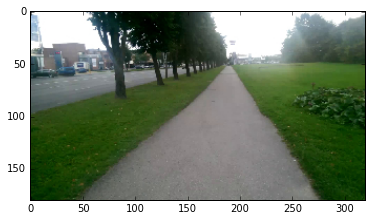

In [4]:
image = scp.misc.imread("./image.jpg")
plt.imshow(image)

Restore model and run TensorFlow interactive session.

In [5]:
# Initializing the variables.
init = tf.global_variables_initializer()

# Saver op to save and restore all the variables.
saver = tf.train.Saver()

# Run interactive session.
sess = tf.InteractiveSession()

# Restore model weights from previously saved model.
saver.restore(sess, MODEL_PATH)

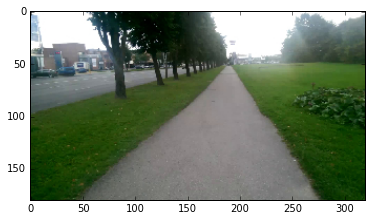

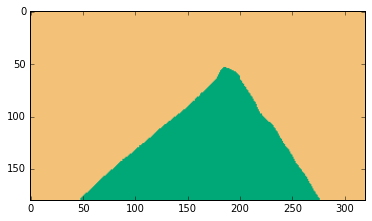

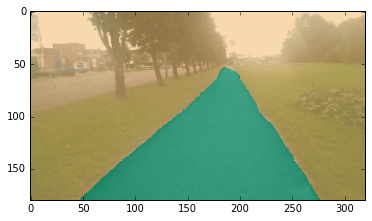

In [6]:
# Get prediction.
prediction = sess.run(vgg_fcn.pred_up, feed_dict={input_placeholder: [image]})
regions_image = utils.regions_to_colored_image(prediction[0], colors).astype(np.uint8)
merged_image = utils.merge_images(image, regions_image, 0.4).astype(np.uint8)

# Plot prediction.
plt.figure(0)
plt.imshow(image)
plt.figure(1)
plt.imshow(regions_image)
plt.figure(2)
plt.imshow(merged_image)